In [1]:
import numpy as np
import torch
from torch import nn
from scipy import sparse
import time
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import zscore
from scipy.stats import sem

In [2]:
variables = ['rho', 'sigma', 'mu', 'kappa', 'chi', 'homesize', 'Frho', 'Fsigma', 'Fmu', 'Fkappa', 'Fchi']
print(len(variables))

11


In [3]:
filenames = ['least_squares.mat', 
             'trials_linear.mat', 
             'trials_linear_fixedsig2.mat',
            'hdim_5_trials.mat', 
             'hdim_5_trials_fixedsig.mat',
            'randomvacc.mat', 
            'novacc.mat']

In [4]:
print(filenames)

['least_squares.mat', 'trials_linear.mat', 'trials_linear_fixedsig2.mat', 'hdim_5_trials.mat', 'hdim_5_trials_fixedsig.mat', 'randomvacc.mat', 'novacc.mat']


In [5]:
vtypes = ['least squares', 'linear, learned sigma', 'linear, fixed sigma', 'neural network, learned sigma', 
          'neural network, fixed sigma', 'random', 'no vaccination']

In [6]:
deaths = np.zeros((7, 1000))
for k in range(7):
    datadict = sio.loadmat(filenames[k])
    deaths[k] = datadict['deaths']

In [7]:
np.mean(deaths, axis=1)

array([134.213, 138.499, 137.175, 155.045, 156.569, 211.778, 259.596])

In [8]:
plt.rcParams.update({'font.size': 24})

Text(0, 0.5, 'average deaths')

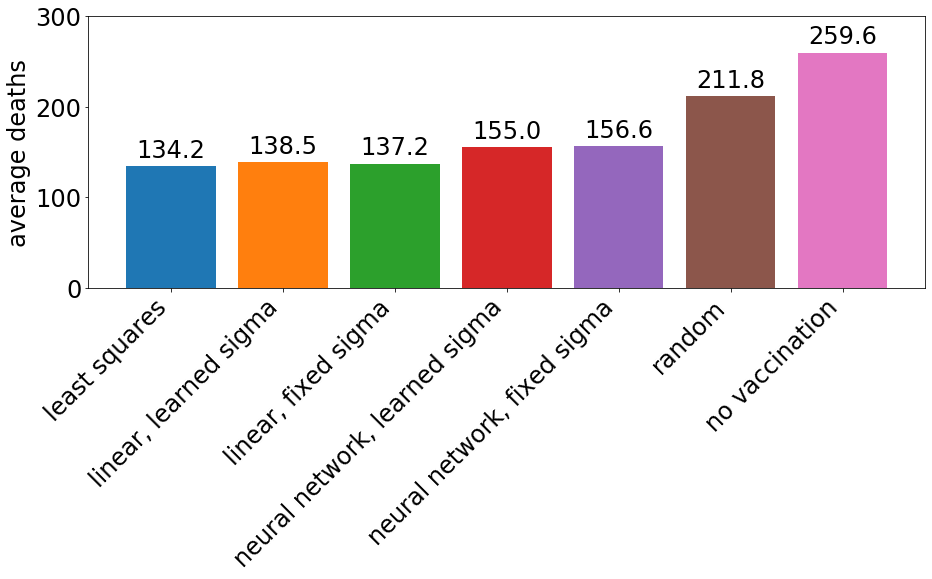

In [9]:
plt.figure(figsize=(15, 5))
for k in range(7):
    plt.bar(k, np.mean(deaths[k]))
    plt.text(k, np.mean(deaths[k]) + 10, np.round(np.mean(deaths[k]), 1), ha='center')
plt.ylim(0, 300)
plt.xticks(np.arange(7), vtypes, rotation=45, ha='right')
plt.ylabel('average deaths')

Text(0, 0.5, 'average deaths\n(% of population)')

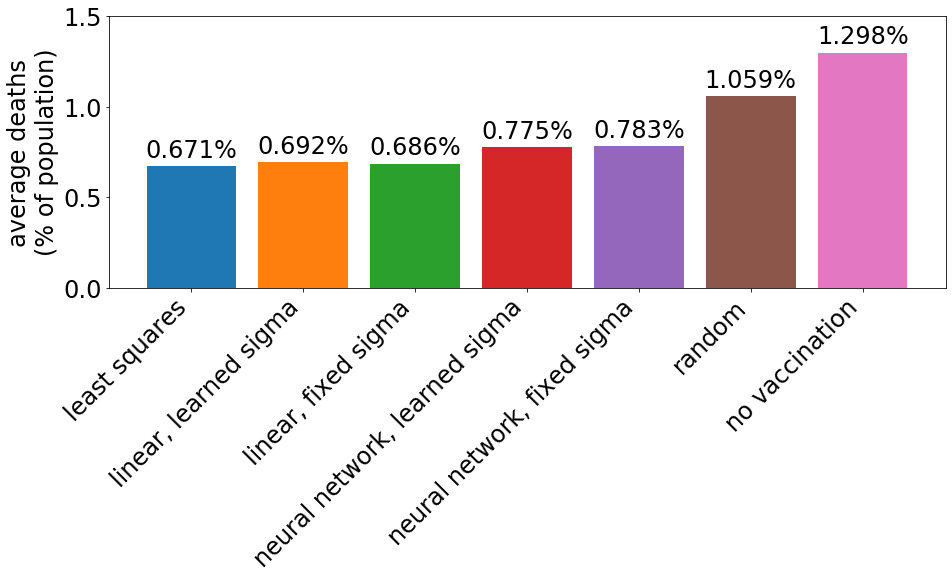

In [10]:
plt.figure(figsize=(15, 5))
for k in range(7):
    plt.bar(k, np.mean(deaths[k])/20000*100)
    plt.text(k, np.mean(deaths[k])/20000*100+0.05, str(np.round(np.mean(deaths[k])/20000*100, 3)) + '%', ha='center')
plt.ylim(0, 1.5)
plt.xticks(np.arange(7), vtypes, rotation=45, ha='right')
plt.ylabel('average deaths\n(% of population)', ha='center')

In [11]:
mus = np.zeros((3, 11))

In [12]:
datadict = sio.loadmat(filenames[0])
mus[0] = datadict['a']

In [13]:
datadict = sio.loadmat(filenames[1])
mus[1] = datadict['mu']

In [14]:
datadict = sio.loadmat(filenames[2])
mus[2] = datadict['mu']

In [15]:
variables = ['outside contact rate', 'susceptibility', 'mortality', 'infectivity', 'symptom level', 
             'home size', 'family max contact rate', 'family max susceptibility', 'family max mortality', 'family max infectivity', 
             'family max symptom level']
print(len(variables))

11


([<matplotlib.axis.XTick at 0x296082f7348>,
 <a list of 11 Text xticklabel objects>)

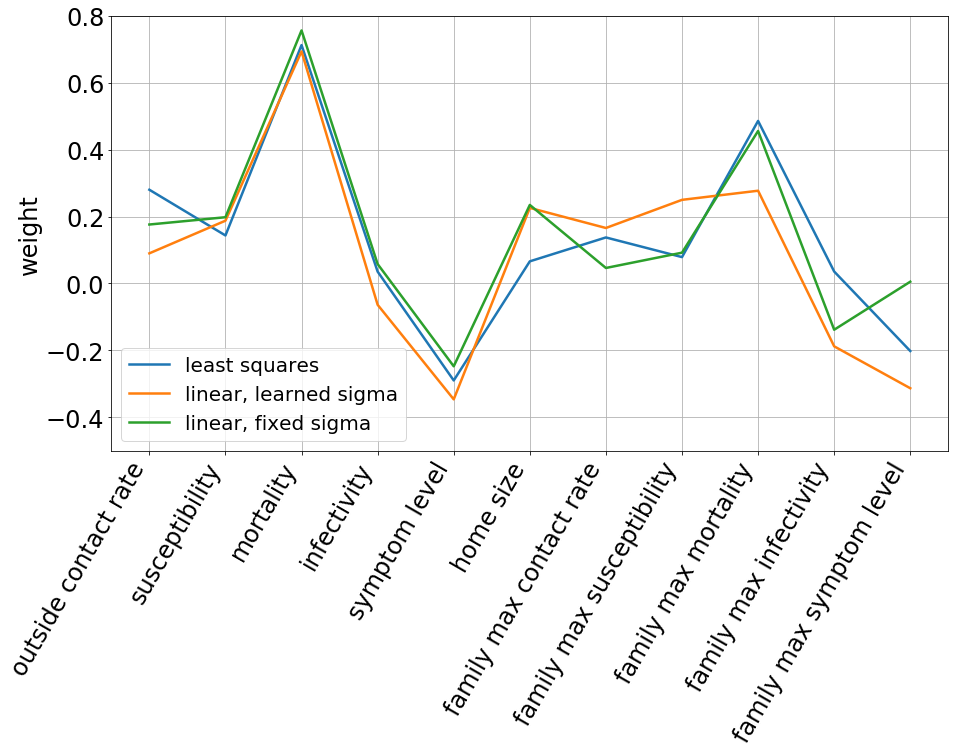

In [16]:
plt.figure(figsize=(15, 8))
for k in range(3):
    plt.plot(mus[k] / np.linalg.norm(mus[k]), lw=2.5)
plt.legend(vtypes[0:3], loc='lower left', fontsize='small')
plt.ylabel('weight')
plt.ylim(-0.5, 0.8)
plt.grid()
plt.xticks(np.arange(11), variables, rotation=60, ha='right')

In [17]:
from scipy.stats import ranksums

In [18]:
heuristics = sio.loadmat('heuristics.mat')

Text(0, 0.5, 'average deaths\n(% of population)')

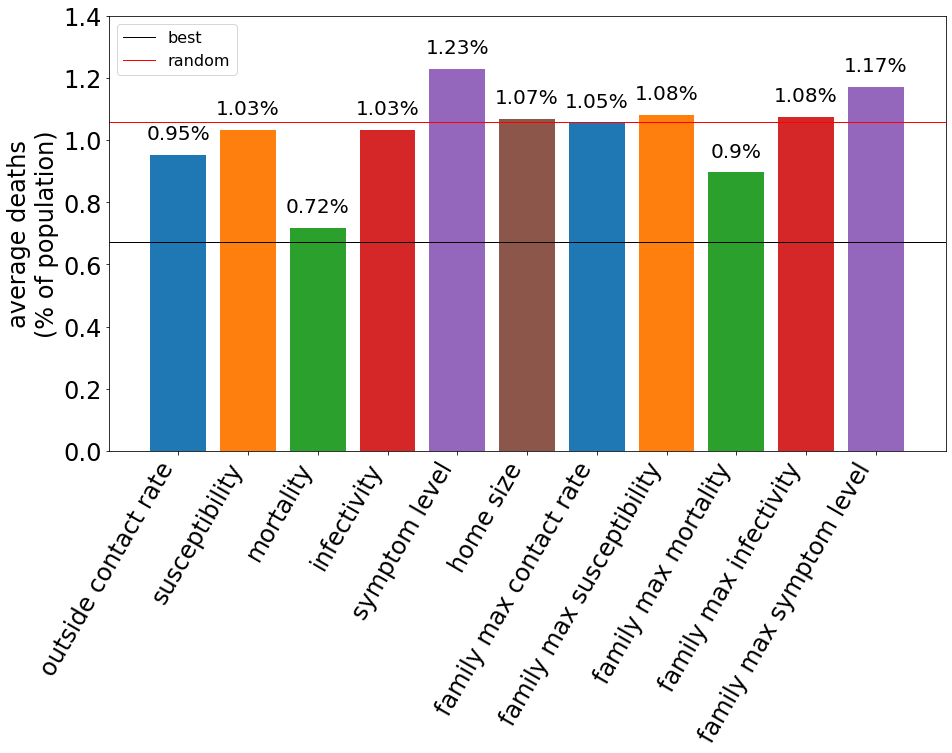

In [20]:
plt.figure(figsize=(15, 8))
plt.plot([-2, 13], [np.mean(deaths[0])/20000*100, np.mean(deaths[0])/20000*100], 'k', lw=1)
plt.plot([-2, 13], [np.mean(deaths[5])/20000*100, np.mean(deaths[5])/20000*100], 'r', lw=1)
plt.legend(['best', 'random'], fontsize=16, loc = 'upper left')
for k in range(6):
    plt.bar(k, np.mean(heuristics['deaths'][k])/20000*100)
    plt.text(k, np.mean(heuristics['deaths'][k])/20000*100+0.05, 
             str(np.round(np.mean(heuristics['deaths'][k])/20000*100, 2)) + '%', ha='center', size=20)
for k in range(4):
    plt.bar(-4, 3)
for k in range(6, 11):
    plt.bar(k, np.mean(heuristics['deaths'][k])/20000*100)
    plt.text(k, np.mean(heuristics['deaths'][k])/20000*100+0.05, 
             str(np.round(np.mean(heuristics['deaths'][k])/20000*100, 2)) + '%', ha='center', size=20)

plt.xticks(np.arange(11), variables, rotation=60, ha='right')
plt.ylim(0, 1.4)
plt.xlim(-1, 11)
plt.ylabel('average deaths\n(% of population)', ha='center')